# Análisis de las canciones más escuchadas entre 2010 y 2019

Todos hemos escuchado alguna canción en una fiesta y pensado: ¿Cómo puede esta mi**** ser tan popular?

Por ello estamos hoy aquí; para entender alguna información interesante de la música famosa, pero sobre todo, para ver si existe una fórmula secreta para crear esa basura de música que escucha todo el mundo

Si no hay código debajo de este texto, estamos en una versión del análisis realizado en la que todo el código ha sido extraído para facilitar la lectura de personas no interesadas en él, sino en el análisis de los datos.

Para tener acceso al GitHub con el código original, hacer clic en el <a href = "https://github.com/JoaquinMateosBarroso/Spotify-songs">enlace<a>.

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#### Guía

1. [Primer vistazo a los datos](#primer_vistazo)

2. [Referencias](#referencias)

#### 1. Primer vistazo a los datos

<html><a id='primer_vistazo'></a></html>

Antes de nada, veamos una lista de las 10 canciones más populares de 2010 a 2019 según Spotify:

In [192]:
df = pd.read_csv("https://raw.githubusercontent.com/JoaquinMateosBarroso/Spotify-songs/main/top10s.csv", encoding='latin')
df.pop("Unnamed: 0")
df = df.drop(df.loc[df["bpm"] == 0].index[0], axis = 0) #Un álbum con todo en 0 daba problemas
top_10 = np.array(df.sort_values(by = "pop", ascending = False).head(10)[["title", "artist"]])
for i in range(10):
    print(str(i+1) + "º " + top_10[i][0] + " - " + top_10[i][1])

1º Memories - Maroon 5
2º Lose You To Love Me - Selena Gomez
3º Someone You Loved - Lewis Capaldi
4º Señorita - Shawn Mendes
5º How Do You Sleep? - Sam Smith
6º Trampoline (with ZAYN) - SHAED
7º South of the Border (feat. Camila Cabello & Cardi B) - Ed Sheeran
8º Truth Hurts - Lizzo
9º Good as Hell (feat. Ariana Grande) - Remix - Lizzo
10º Happier - Marshmello


La calidad de setas canciones queda a gusto del lector, pero creo que da un buen punto de partida para preguntarnos qué las hace tan populares

A continuación dejaremos algunas estadísticas acerca de 600 de las canciones más populares que pueden ser de interés.

Sin embargo, todavía no será fácil sacar ninguna conclusión, con las cuales empezaremos en el capítulo 2, mediante el uso de algunos algoritmos de aprendizaje automático

Se adjunta en <a href = "https://github.com/JoaquinMateosBarroso/Spotify-songs/raw/main/about.pdf">este pdf</a> el significado de cada dimensión de los datos que tenemos, cuyo nombre ha sido abreviado en este análisis para compactar algunas tablas y gráficos

In [193]:
top_genres_5 = df["top genre"].value_counts()
top_genres_5 /= top_genres_5.sum()
top_genres_5 = top_genres_5.sort_values(ascending = False)
top_genres_5 = pd.concat([top_genres_5[:5], pd.Series(top_genres_5[5:].sum(), index = ["others"])])


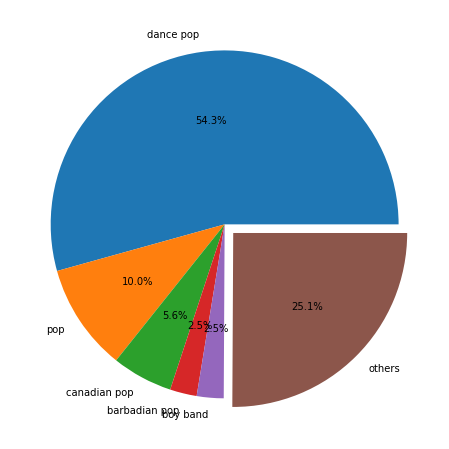

In [194]:
fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.pie(top_genres_5, labels = top_genres_5.index, autopct='%.1f%%', explode=(0, 0, 0, 0, 0, 0.07))
plt.show()

Características en función de la popularidad de la canción (Sobre 100)

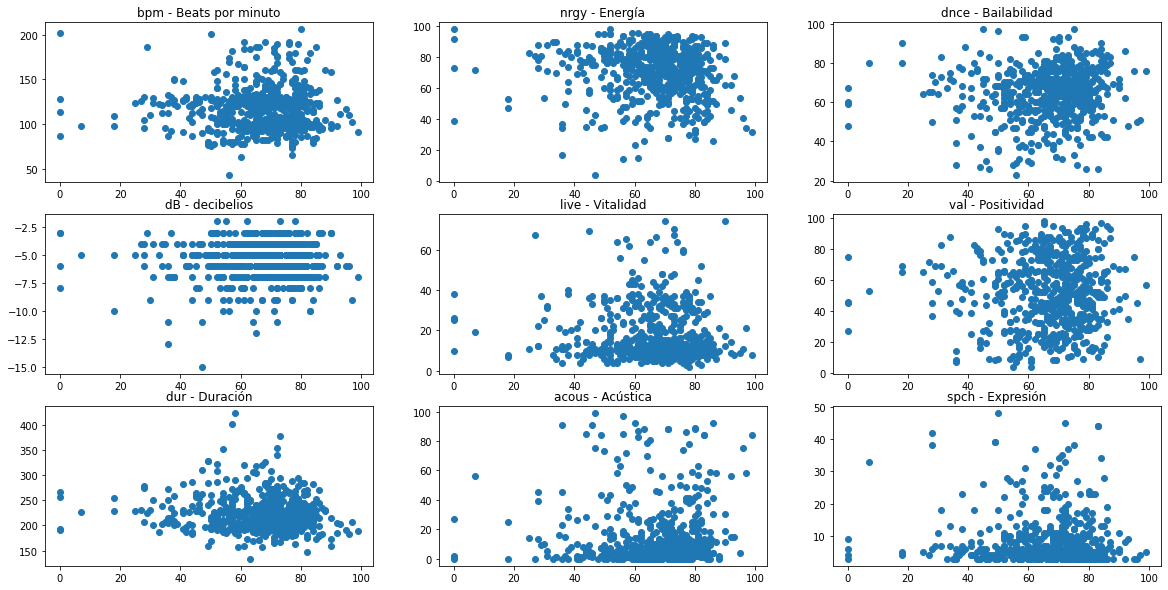

In [195]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(20, 10)

axs[0][0].scatter(df["pop"], df["bpm"])
axs[0][0].set_title("bpm - Beats por minuto")
axs[0][1].scatter(df["pop"], df["nrgy"])
axs[0][1].set_title("nrgy - Energía")
axs[0][2].scatter(df["pop"], df["dnce"])
axs[0][2].set_title("dnce - Bailabilidad")
axs[1][0].scatter(df["pop"], df["dB"])
axs[1][0].set_title("dB - decibelios")
axs[1][1].scatter(df["pop"], df["live"])
axs[1][1].set_title("live - Vitalidad")
axs[1][2].scatter(df["pop"], df["val"])
axs[1][2].set_title("val - Positividad")
axs[2][0].scatter(df["pop"], df["dur"])
axs[2][0].set_title("dur - Duración")
axs[2][1].scatter(df["pop"], df["acous"])
axs[2][1].set_title("acous - Acústica")
axs[2][2].scatter(df["pop"], df["spch"])
axs[2][2].set_title("spch - Expresión")

plt.show()

Tabla con la media, desviación típica, y cuantiles de cada característica que tenemos

In [196]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,602.0,2014.589701,2.608592,2010.0,2013.0,2015.0,2017.00,2019.0
bpm,602.0,118.742525,24.339497,43.0,100.0,120.0,129.00,206.0
nrgy,602.0,70.621262,16.068471,4.0,61.0,74.0,82.00,98.0
dnce,602.0,64.486711,13.129357,23.0,57.0,66.0,73.00,97.0
dB,602.0,-5.488372,1.704657,-15.0,-6.0,-5.0,-4.00,-2.0
live,602.0,17.803987,13.093347,2.0,9.0,12.0,24.00,74.0
val,602.0,52.312292,22.430640,4.0,35.0,52.0,69.00,98.0
dur,602.0,224.671096,34.158310,134.0,202.0,220.5,239.75,424.0
acous,602.0,14.350498,20.775203,0.0,2.0,6.0,17.00,99.0
spch,602.0,8.372093,7.481608,3.0,4.0,5.0,9.00,48.0


Matriz de correlación porcentural de los valores que tenemos (La posición (i, j) de la matriz indica "cuánto aumenta" la variable j por cada unidad que aumenta i)

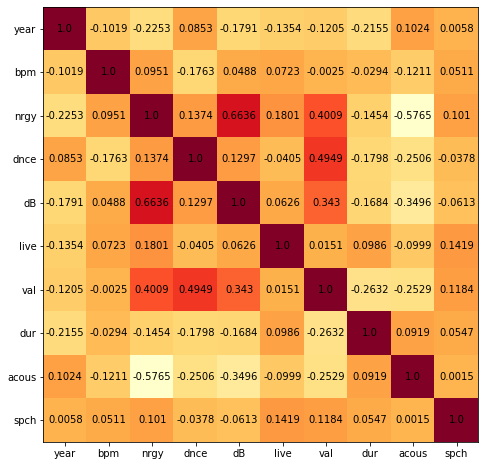

In [197]:
corr_matrix = df.iloc[:, 3:-1].corr()
fig, ax = plt.subplots(figsize = (8, 8))
fig = plt.imshow(corr_matrix, cmap = "YlOrRd")
ax.set_xticks(range(10))
ax.set_xticklabels(df.axes[1][3:-1])
ax.set_yticks(range(10))
ax.set_yticklabels(df.axes[1][3:-1])
for (j,i),label in np.ndenumerate((corr_matrix).round(4)):
    ax.text(i,j,label,ha='center',va='center')
plt.show()

Podemos ver que, la mayoría de valores son relativamente bajos, por lo que no existe una gran correlación entre los datos; cada uno es relativamente independiente del resto.

 Si analizáramos decenas de miles de datos, esto implicaría que el uso de machine learning va a ser muy costoso, sin embargo, esto es positivo en nuestro caso, pues la única finalidad de este notebook es el aprendizaje, y, al tener los datos más dispersados, tenemos más variables que estudiar

Sin embargo, filtremos los valores más altos para estudiar ciertas correlaciones

In [223]:
n = 1
prev_max = []
for i in corr_matrix.axes[0]:
    sorted = corr_matrix.sort_values(by = i, ascending = False).loc[:, i]
    j = 1
    max = [[i, sorted.axes[0][j]], sorted[j]]   #Empezamos por el segundo valor más alto de la dimensión y porque el primero será el 1 de la misma dimensión x
    max[0].sort()
    while j < 9 and np.abs(max[1]) > .3:
        if not max[0] in prev_max:
            print("{}. {} y {} guardan una correlación de {}".format(n, *max[0], max[1]))
            n += 1
            prev_max.append(max[0])
            max = [[i, sorted.axes[0][j]], sorted[j]]
        j += 1

1. dB y nrgy guardan una correlación de 0.6636232912364455
2. nrgy y dB guardan una correlación de 0.6636232912364455
3. nrgy y val guardan una correlación de 0.40094533033235785
4. dnce y val guardan una correlación de 0.4949279984978635


In [200]:
for i in corr_matrix.axes[0]:
    max = corr_matrix.loc[corr_matrix[i] > .45]
    print(max.iloc[0, 0])

1.0
-0.10193241041583478
-0.22529556019796101
0.08527208200499536
-0.22529556019796101
-0.13535236926565006
0.08527208200499536
-0.21545795268801907
0.10241051546813783
0.005789469919566895


#### 2. PCA(Análisis de Componentes Principales) 

Dado que el análisis mediante aprendizaje automático de grandes cantidades de datos es altmanente costoso, y este coste aumenta exponencialmente con varias dimensiones, antes de aplicarlo se suele realizar una reducción de dimensionalidad, creando unas nuevas dimensiones abstractas que maxifiquen la eficiencia del programa, y en este caso lo haremos mediante PCA
Tal vez, con 600 canciones a analizar, no sea necesario el uso de este algoritmo, aunque siempre es una buena técnica para sacar más datos en el análisis exploratorio

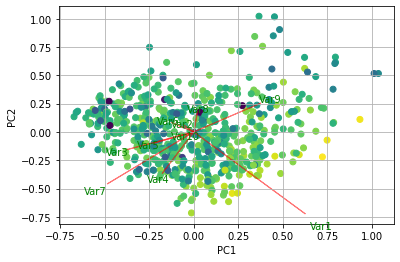

In [201]:
normalized_df = df.loc[:, "year":"spch"].astype(float)
normalized_df = (normalized_df-normalized_df.min())/(normalized_df.max()-normalized_df.min())

y = np.array(df["pop"])

pca = PCA()
pca.fit(normalized_df, y)
new_df = pca.transform(normalized_df)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(new_df[:,0:2], pca.components_.T)
plt.show()


#### 4. Conclusiones
<html><a id='conclusiones'></a></html>

1. <a id = "conclusiones_1"></a>
Podemos ver que 

#### 99. Referencias
<html><a id='referencias'></a></html>

El archivo usado para el análsis ha sido extraído de la plataforma de bases de datos kaggle, que es open source, por lo que tenemos todo el derecho a hacer lo que queramos con los datos.<br>
Adjunto link a la base de datos <a href="https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year/code" target="_blank">aquí</a>.